In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("C:/Users/danus/OneDrive/Desktop/dirty_cafe_sales.csv")

In [8]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [9]:
print(df.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [10]:
print(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [11]:
df.shape

(10000, 8)

In [12]:
print(df.describe(include="all"))

       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [13]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in Transaction ID: 10000
Unique values in Item: 10
Unique values in Quantity: 7
Unique values in Price Per Unit: 8
Unique values in Total Spent: 19
Unique values in Payment Method: 5
Unique values in Location: 4
Unique values in Transaction Date: 367


In [14]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [15]:
df['Payment Method'].replace('UNKNOWN', np.nan, inplace=True)
df['Location'].replace('UNKNOWN', np.nan, inplace=True)

In [16]:
payment_mode = df['Payment Method'].mode()[0]
df['Payment Method'].fillna(payment_mode, inplace=True)

In [17]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


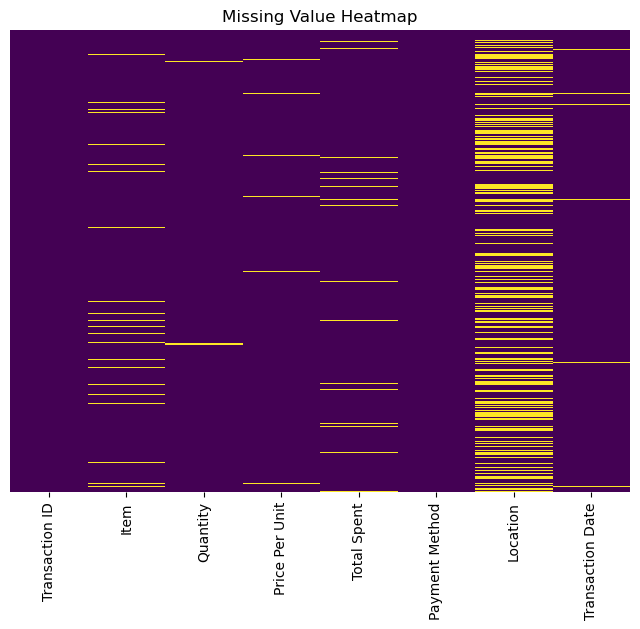

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()


In [19]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()

print(df)


     Transaction ID      Item Quantity Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee        2            2.0          4.0   
1       TXN_4977031      Cake        4            3.0         12.0   
2       TXN_4271903    Cookie        4            1.0          NaN   
3       TXN_7034554     Salad        2            5.0         10.0   
4       TXN_3160411    Coffee        2            2.0          4.0   
...             ...       ...      ...            ...          ...   
9995    TXN_7672686    Coffee        2            2.0          4.0   
9996    TXN_9659401       NaN        3            NaN          3.0   
9997    TXN_5255387    Coffee        4            2.0          8.0   
9998    TXN_7695629    Cookie        3            NaN          3.0   
9999    TXN_6170729  Sandwich        3            4.0         12.0   

      Payment Method  Location Transaction Date    Year  Month   Day  \
0        Credit Card  Takeaway       2023-09-08  2023.0    9.0   8.0   
1              

In [20]:
df['Quantity'].isnull().sum()

np.int64(138)

In [21]:
df['Price Per Unit'].isnull().sum()

np.int64(179)

In [22]:
df['Total Spent'].isnull().sum()

np.int64(502)

In [23]:
df['Item'].isnull().sum()

np.int64(333)

In [24]:
df['Location'].isnull().sum()

np.int64(3603)

In [25]:
df['Item'].isnull().sum()

np.int64(333)

In [26]:
most_frequent_item = df['Item'].mode()[0]
df['Item'] = df['Item'].fillna(most_frequent_item)

In [27]:
df['Item'].isnull().sum()

np.int64(0)

In [28]:
most_frequent_item = df['Quantity'].mode()[0]
df['Quantity'] = df['Quantity'].fillna(most_frequent_item)

In [29]:
most_frequent_item = df['Price Per Unit'].mode()[0]
df['Price Per Unit'] = df['Price Per Unit'].fillna(most_frequent_item)

In [30]:
most_frequent_item = df['Total Spent'].mode()[0]
df['Total Spent'] = df['Total Spent'].fillna(most_frequent_item)

In [31]:
most_frequent_item = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(most_frequent_item)

In [32]:
most_frequent_item = df['Month'].mode()[0]
df['Month'] = df['Month'].fillna(most_frequent_item)

In [33]:
most_frequent_item = df['Day'].mode()[0]
df['Day'] = df['Day'].fillna(most_frequent_item)

In [34]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['DayOfWeek'] = df['DayOfWeek'].fillna(df['DayOfWeek'].mode()[0])

In [35]:
df = df.drop(columns=['Transaction Date'])

In [36]:
df.isnull().sum()

Transaction ID    0
Item              0
Quantity          0
Price Per Unit    0
Total Spent       0
Payment Method    0
Location          0
Year              0
Month             0
Day               0
DayOfWeek         0
dtype: int64

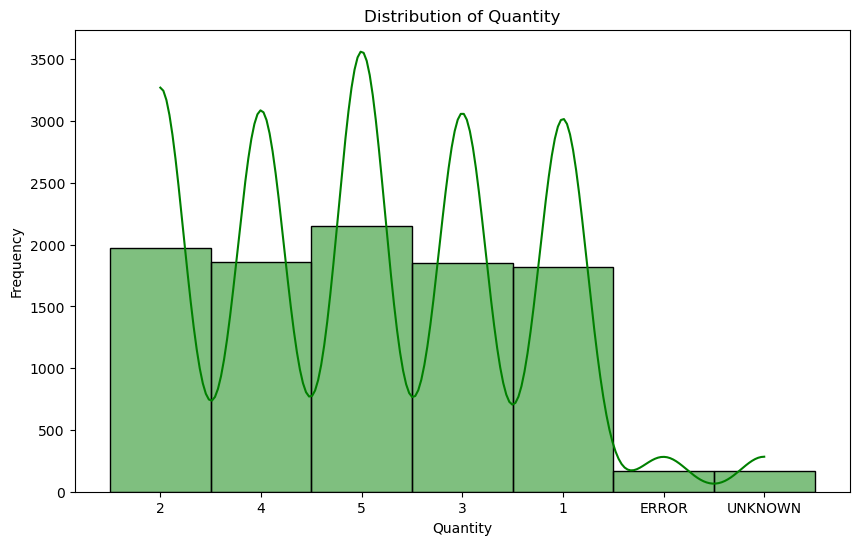

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=True, color='green')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

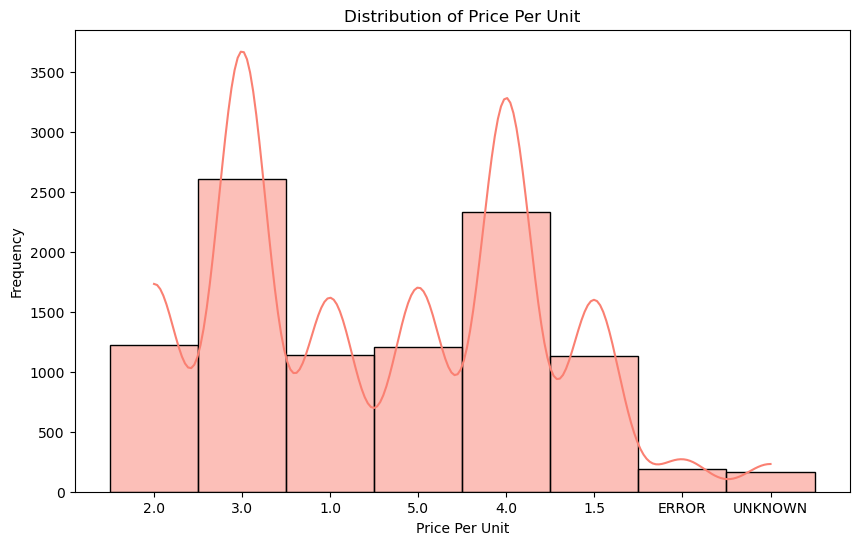

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Per Unit'], kde=True, color='salmon')
plt.title('Distribution of Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.show()

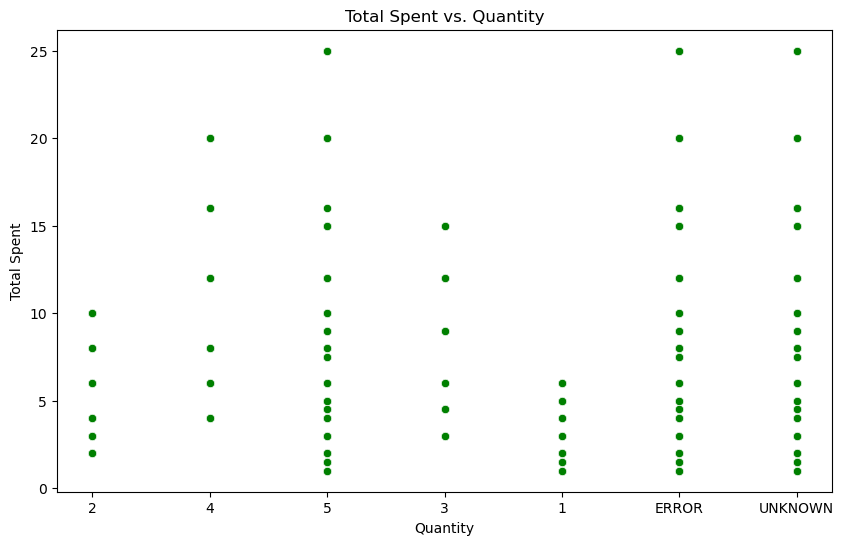

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Spent', data=df, color='green')
plt.title('Total Spent vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.show()

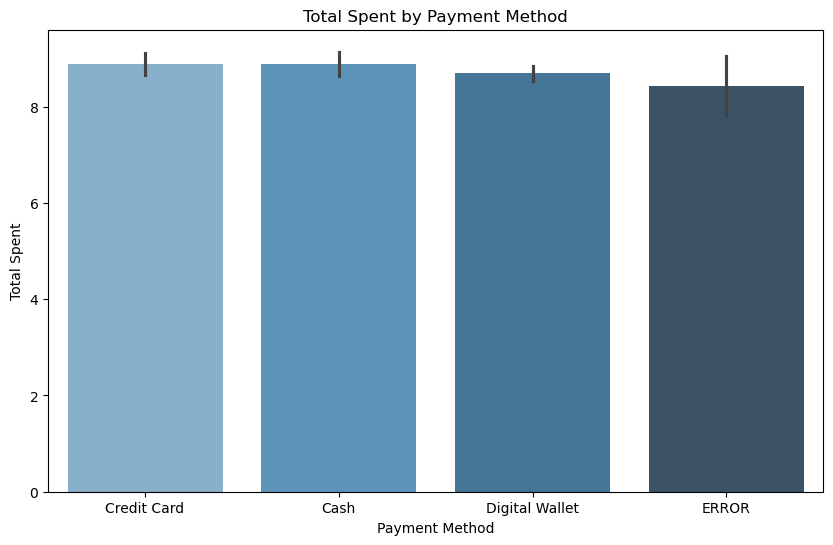

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Total Spent', data=df, palette='Blues_d')
plt.title('Total Spent by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spent')
plt.show()

<Axes: >

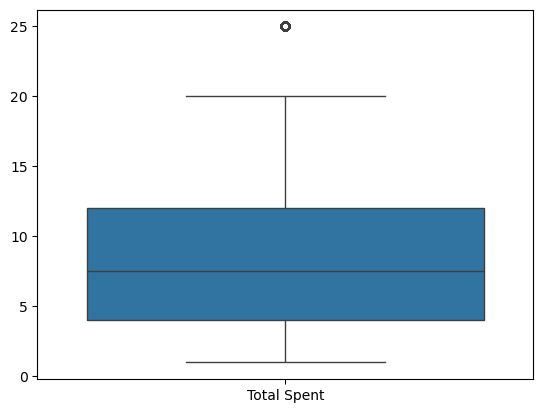

In [44]:
sns.boxplot(data=df[['Quantity', 'Price Per Unit', 'Total Spent']])

<Axes: xlabel='Payment Method', ylabel='count'>

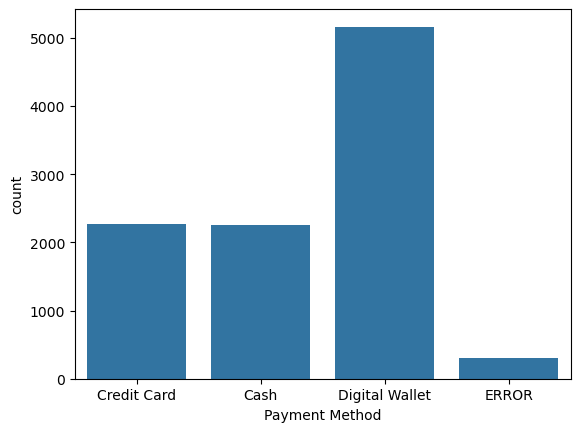

In [45]:
sns.countplot(x='Payment Method', data=df)

<Axes: xlabel='DayOfWeek', ylabel='count'>

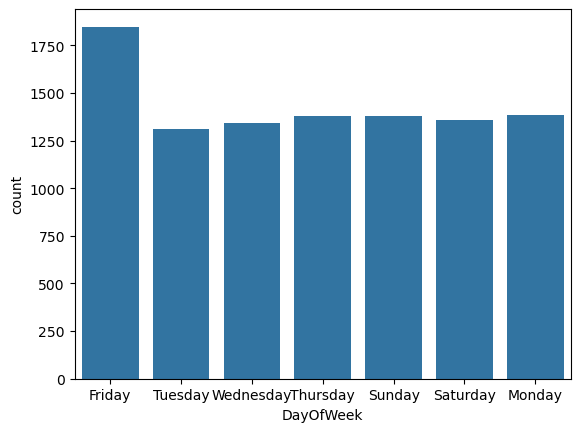

In [46]:
sns.countplot(x='DayOfWeek', data=df)

<Axes: xlabel='DayOfWeek', ylabel='Total Spent'>

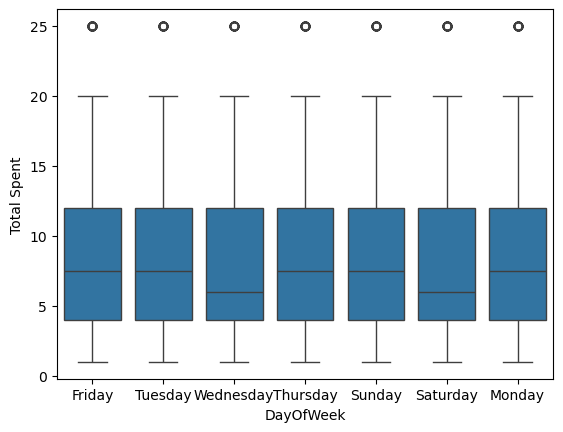

In [47]:
sns.boxplot(x='DayOfWeek', y='Total Spent', data=df)

<Axes: xlabel='Quantity', ylabel='Total Spent'>

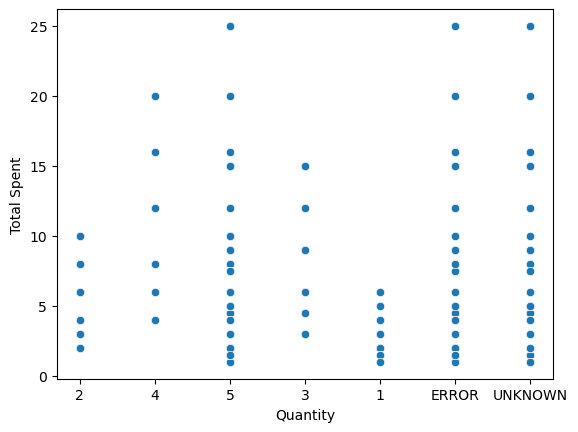

In [48]:
sns.scatterplot(x='Quantity', y='Total Spent', data=df)

<Axes: xlabel='Item'>

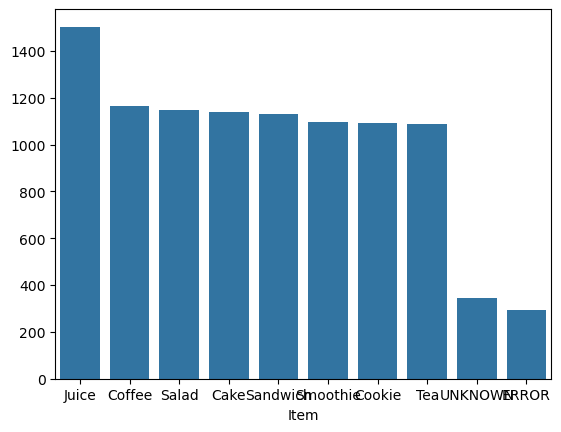

In [49]:
item_counts = df['Item'].value_counts()
sns.barplot(x=item_counts.index, y=item_counts.values)

<Axes: xlabel='Location'>

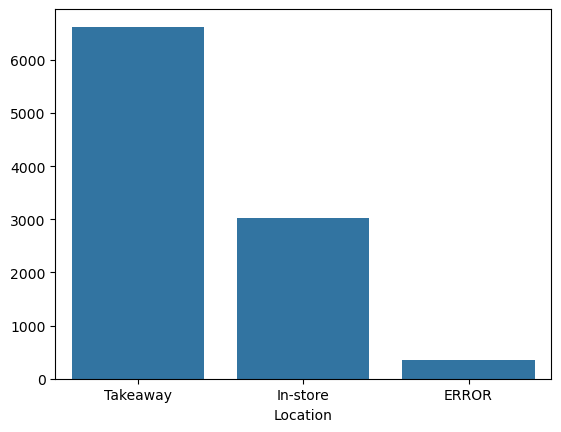

In [50]:
location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values)

<Axes: xlabel='Location', ylabel='Total Spent'>

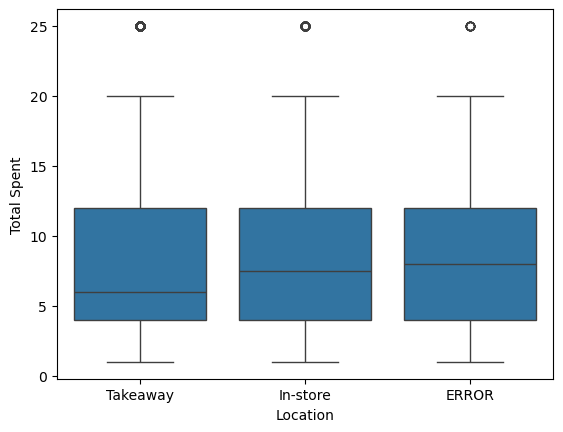

In [51]:
sns.boxplot(x='Location', y='Total Spent', data=df)

<Axes: xlabel='Month'>

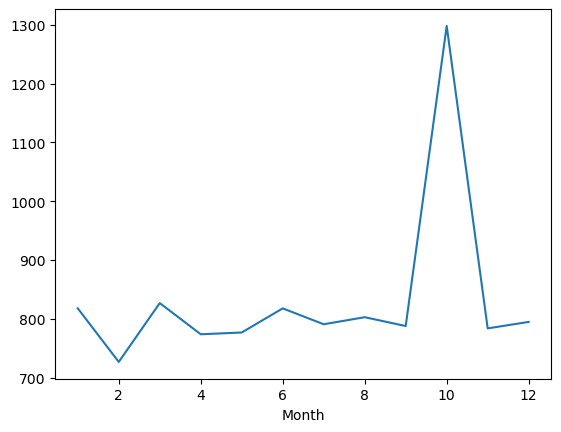

In [52]:
transaction_per_month = df.groupby('Month').size()
transaction_per_month.plot(kind='line')

<Axes: xlabel='Day'>

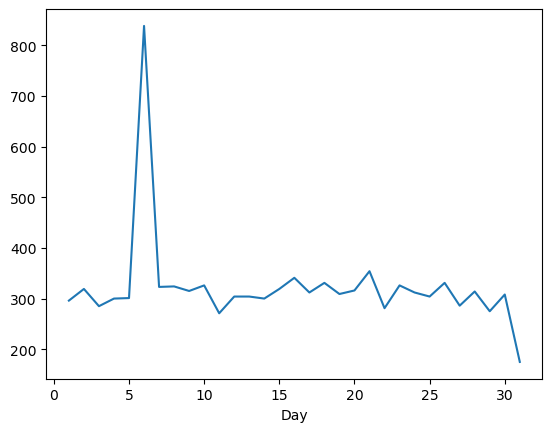

In [53]:
transaction_per_day = df.groupby('Day').size()
transaction_per_day.plot(kind='line')

<Axes: xlabel='DayOfWeek'>

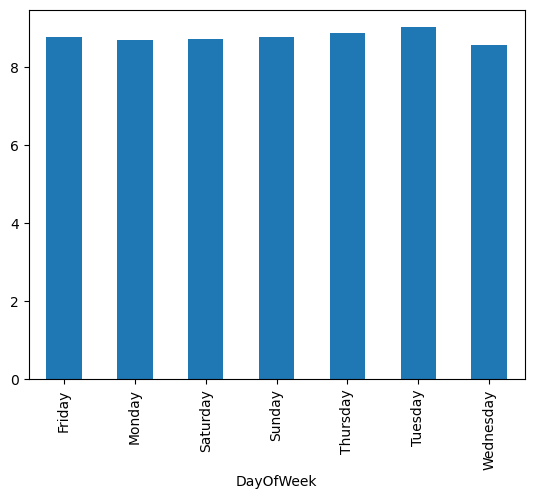

In [54]:
average_spending_by_day = df.groupby('DayOfWeek')['Total Spent'].mean()
average_spending_by_day.plot(kind='bar')

<Axes: xlabel='Date'>

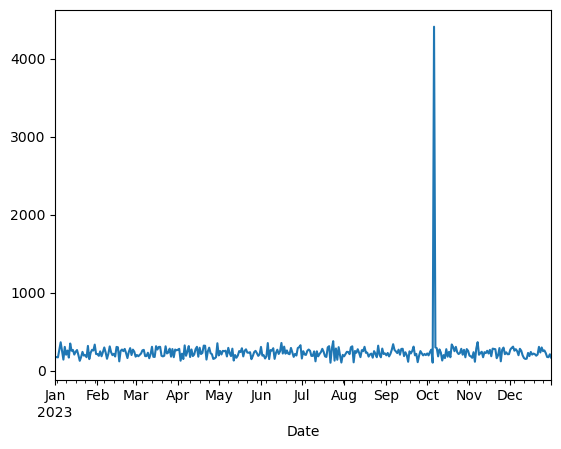

In [55]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.groupby('Date')['Total Spent'].sum().plot(kind='line')

<Axes: >

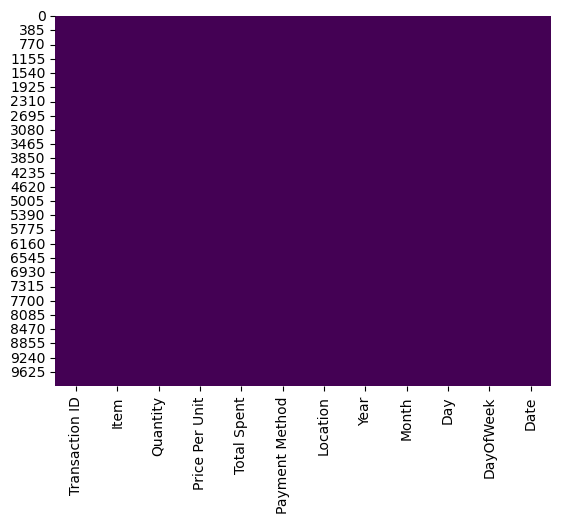

In [56]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [57]:
print(df['Price Per Unit'].dtype)

object


In [58]:
print(df.dtypes)

Transaction ID            object
Item                      object
Quantity                  object
Price Per Unit            object
Total Spent              float64
Payment Method            object
Location                  object
Year                     float64
Month                    float64
Day                      float64
DayOfWeek                 object
Date              datetime64[ns]
dtype: object


In [59]:
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    print(f"{col}: {unique_types}")

Transaction ID: [<class 'str'>]
Item: [<class 'str'>]
Quantity: [<class 'str'>]
Price Per Unit: [<class 'str'>]
Total Spent: [<class 'float'>]
Payment Method: [<class 'str'>]
Location: [<class 'str'>]
Year: [<class 'float'>]
Month: [<class 'float'>]
Day: [<class 'float'>]
DayOfWeek: [<class 'str'>]
Date: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


In [60]:
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [61]:
print(df.dtypes)

Transaction ID            object
Item                      object
Quantity                 float64
Price Per Unit           float64
Total Spent              float64
Payment Method            object
Location                  object
Year                     float64
Month                    float64
Day                      float64
DayOfWeek                 object
Date              datetime64[ns]
dtype: object


In [62]:
df = df.drop(columns=['Date'])

In [63]:
df = df.drop(columns=['Transaction ID'])

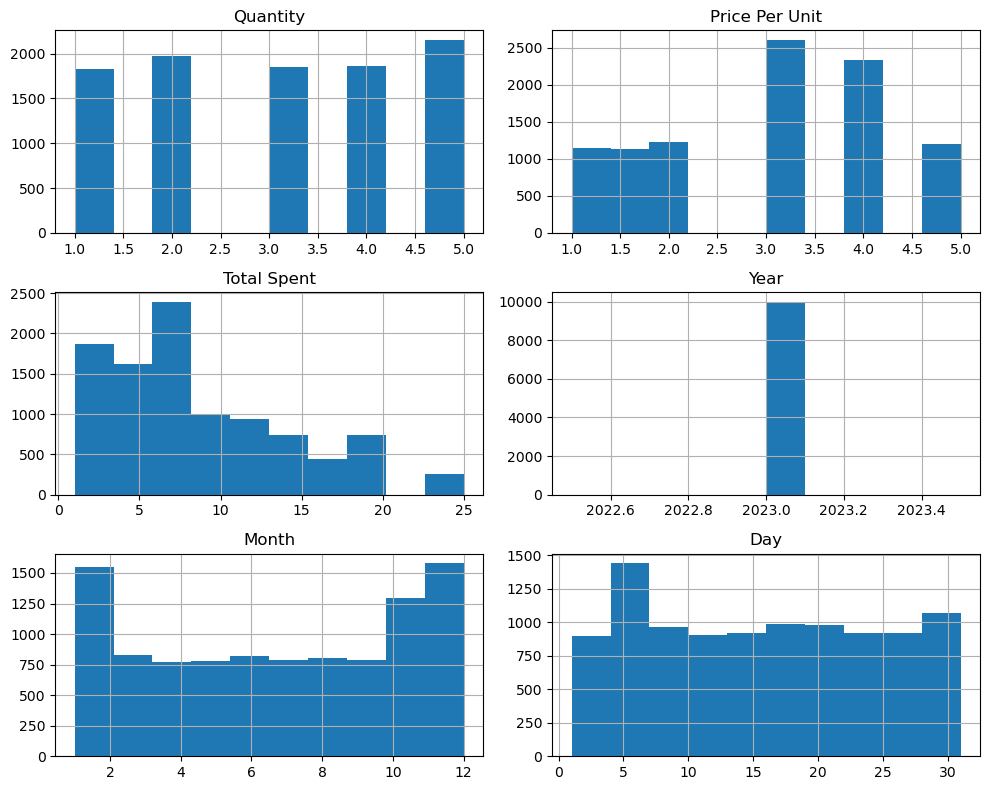

In [64]:
numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']
df[numerical_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

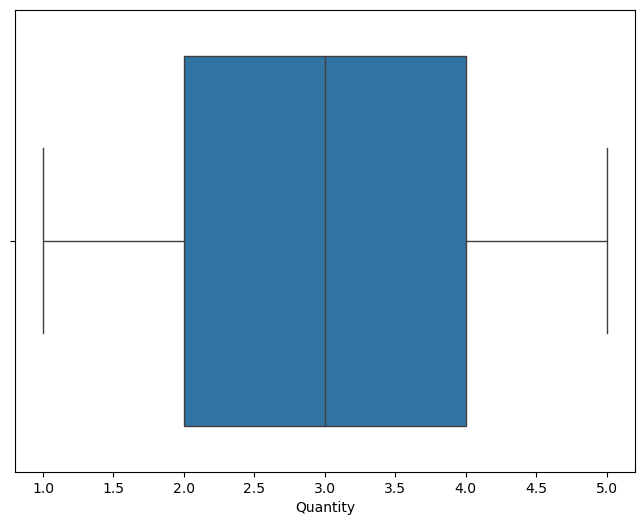

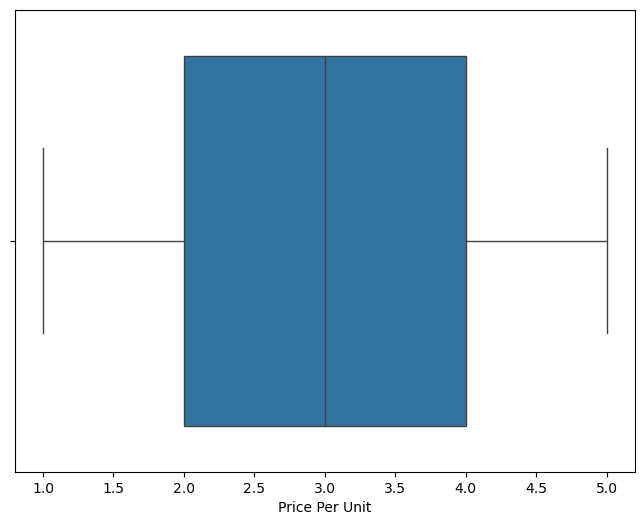

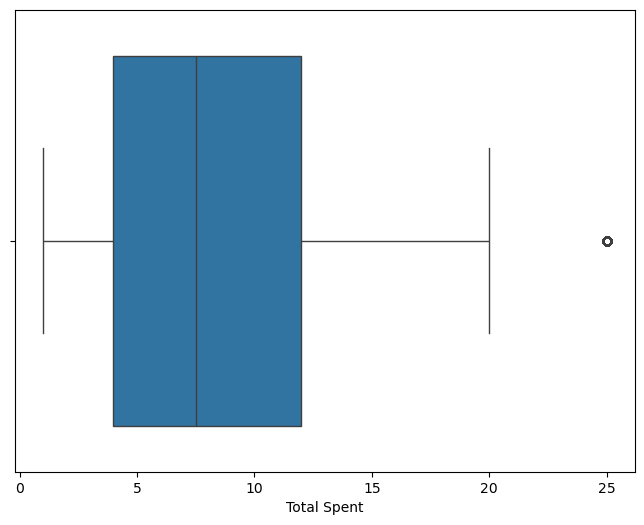

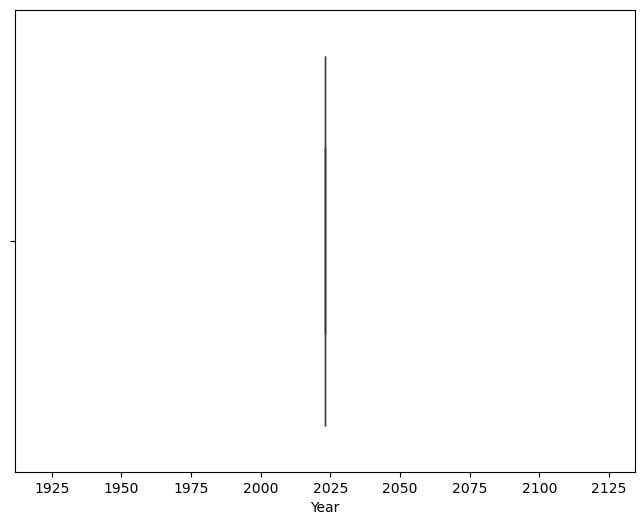

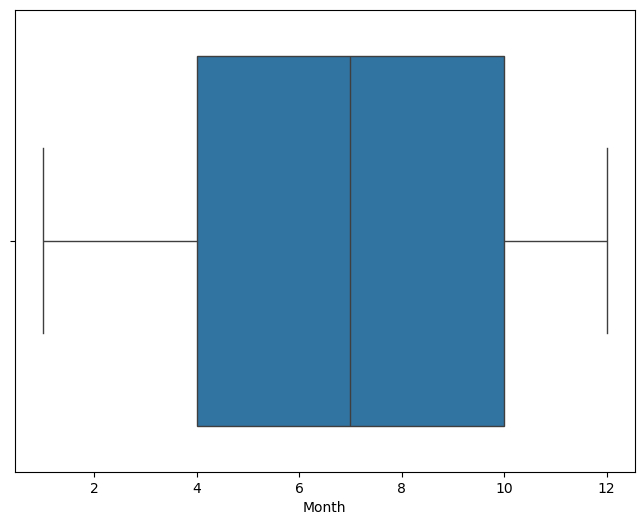

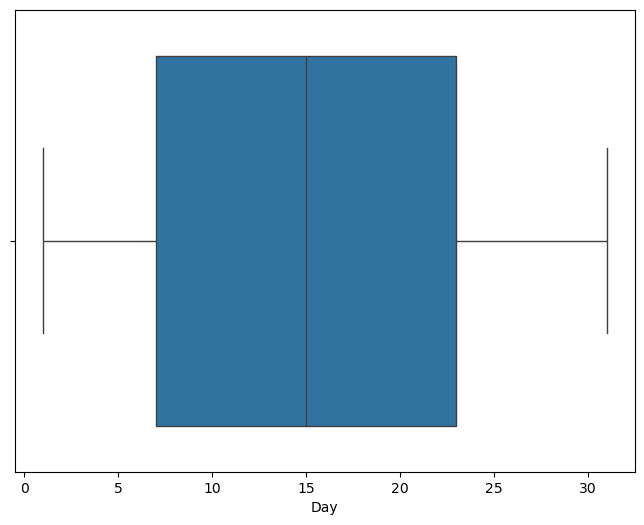

In [65]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.show()

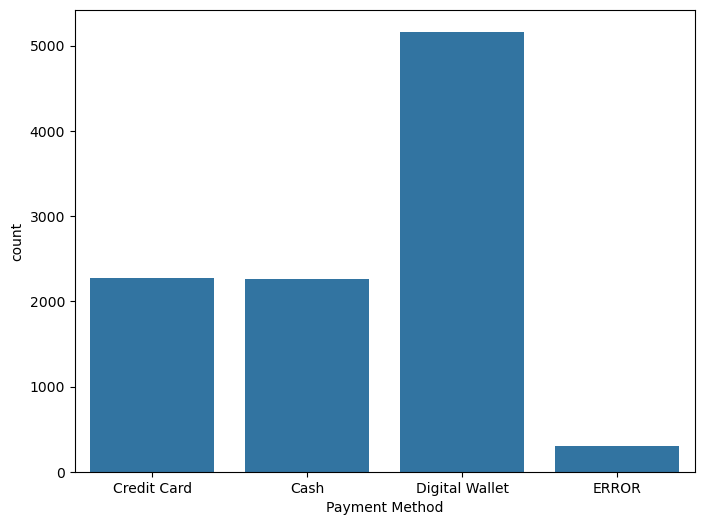

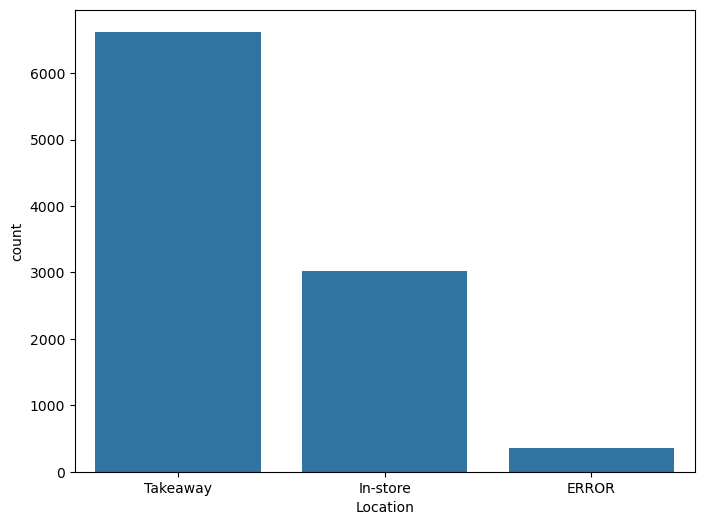

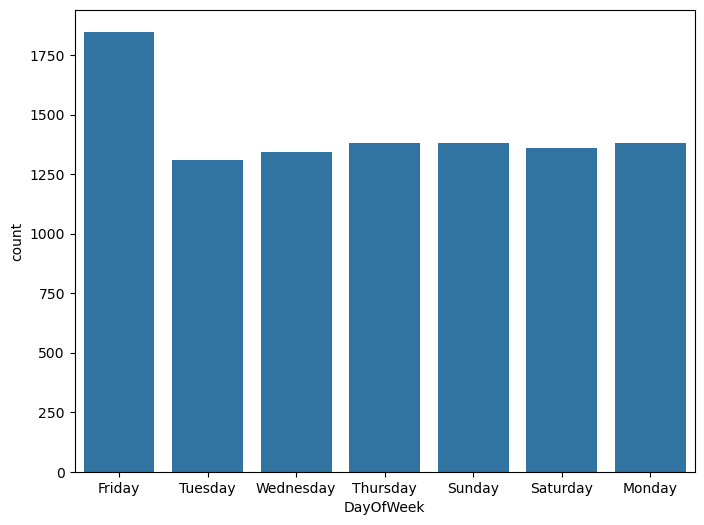

In [66]:
categorical_columns = ['Payment Method', 'Location', 'DayOfWeek']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.show()

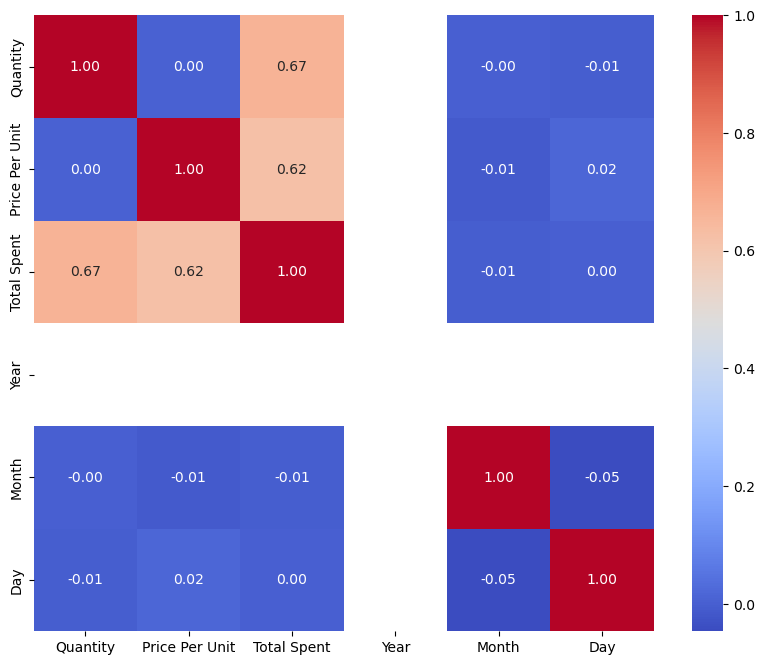

In [67]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

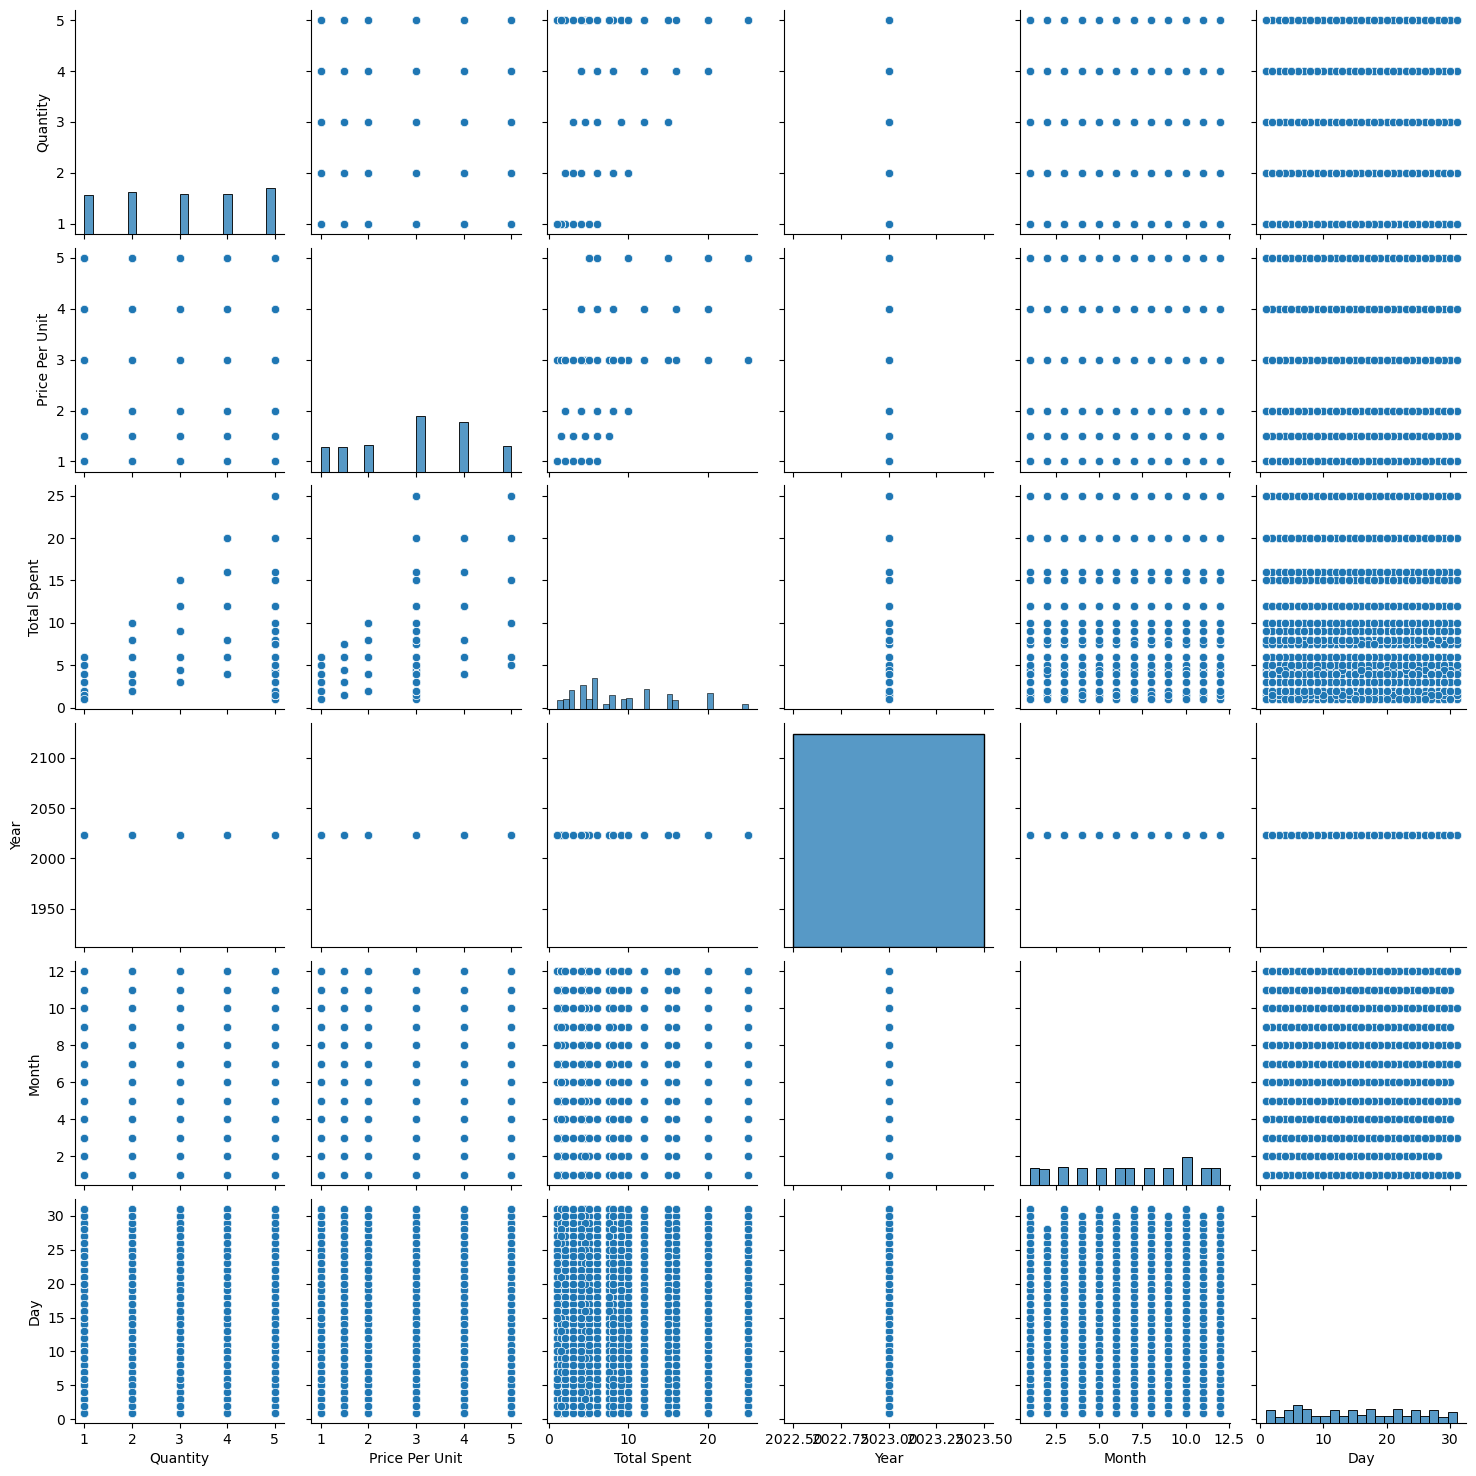

In [68]:
sns.pairplot(df[numerical_columns])
plt.show()

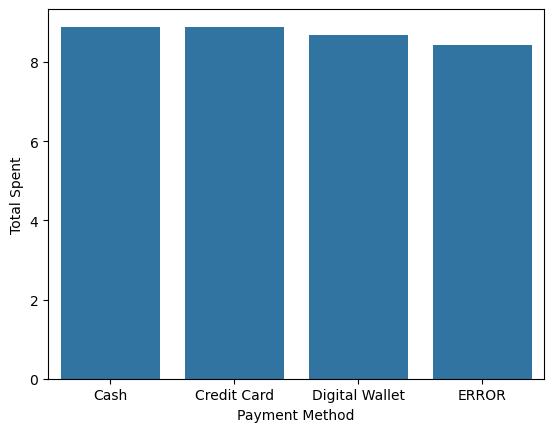

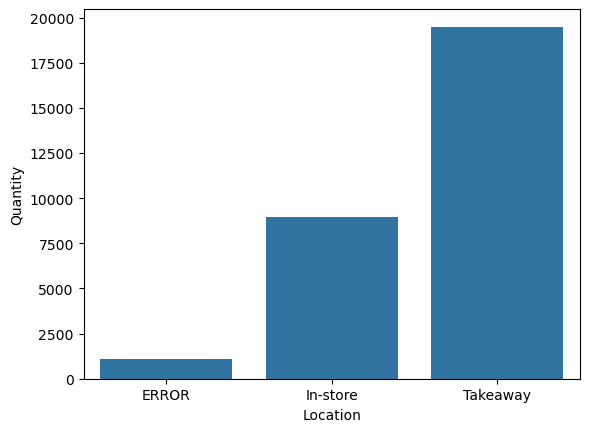

In [69]:
# Group by Payment Method and calculate the mean Total Spent
payment_method_spent = df.groupby('Payment Method')['Total Spent'].mean().reset_index()
sns.barplot(data=payment_method_spent, x='Payment Method', y='Total Spent')
plt.show()

# Group by Location and calculate the sum of Quantity
location_quantity = df.groupby('Location')['Quantity'].sum().reset_index()
sns.barplot(data=location_quantity, x='Location', y='Quantity')
plt.show()

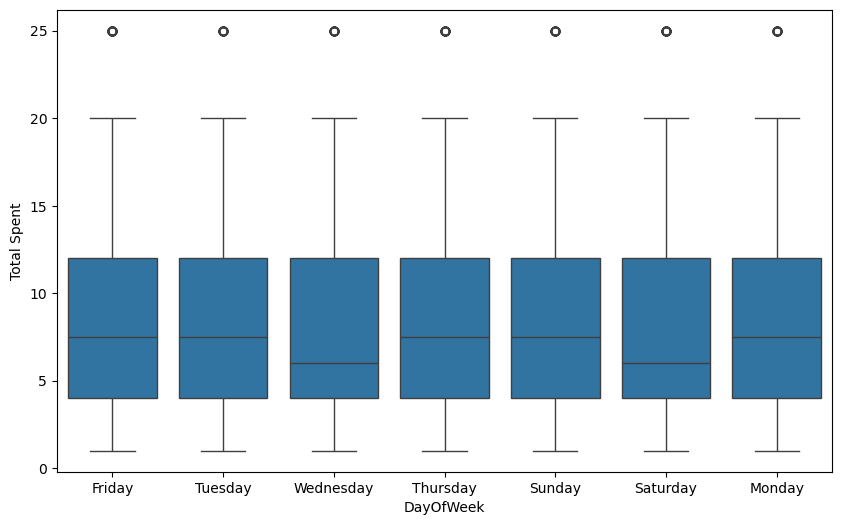

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DayOfWeek', y='Total Spent')
plt.show()

In [71]:
# List of numerical columns
numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows where the column value is outside the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Display the cleaned dataset
print(df_cleaned)

          Item  Quantity  Price Per Unit  Total Spent  Payment Method  \
0       Coffee       2.0             2.0          4.0     Credit Card   
1         Cake       4.0             3.0         12.0            Cash   
2       Cookie       4.0             1.0          6.0     Credit Card   
3        Salad       2.0             5.0         10.0  Digital Wallet   
4       Coffee       2.0             2.0          4.0  Digital Wallet   
...        ...       ...             ...          ...             ...   
9995    Coffee       2.0             2.0          4.0  Digital Wallet   
9996     Juice       3.0             3.0          3.0  Digital Wallet   
9997    Coffee       4.0             2.0          8.0  Digital Wallet   
9998    Cookie       3.0             3.0          3.0  Digital Wallet   
9999  Sandwich       3.0             4.0         12.0            Cash   

      Location    Year  Month   Day  DayOfWeek  
0     Takeaway  2023.0    9.0   8.0     Friday  
1     In-store  2023.0   

In [72]:
from sklearn.preprocessing import LabelEncoder



# List of categorical columns
categorical_columns = ['Payment Method', 'Location', 'DayOfWeek']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataset with encoded labels
print(df)

          Item  Quantity  Price Per Unit  Total Spent  Payment Method  \
0       Coffee       2.0             2.0          4.0               1   
1         Cake       4.0             3.0         12.0               0   
2       Cookie       4.0             1.0          6.0               1   
3        Salad       2.0             5.0         10.0               2   
4       Coffee       2.0             2.0          4.0               2   
...        ...       ...             ...          ...             ...   
9995    Coffee       2.0             2.0          4.0               2   
9996     Juice       3.0             3.0          3.0               2   
9997    Coffee       4.0             2.0          8.0               2   
9998    Cookie       3.0             3.0          3.0               2   
9999  Sandwich       3.0             4.0         12.0               0   

      Location    Year  Month   Day  DayOfWeek  
0            2  2023.0    9.0   8.0          0  
1            1  2023.0   

In [73]:
# List of categorical columns
categorical_columns = ['Item']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataset with encoded labels
print(df)

      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location  \
0        1       2.0             2.0          4.0               1         2   
1        0       4.0             3.0         12.0               0         1   
2        2       4.0             1.0          6.0               1         1   
3        5       2.0             5.0         10.0               2         2   
4        1       2.0             2.0          4.0               2         1   
...    ...       ...             ...          ...             ...       ...   
9995     1       2.0             2.0          4.0               2         2   
9996     4       3.0             3.0          3.0               2         2   
9997     1       4.0             2.0          8.0               2         2   
9998     2       3.0             3.0          3.0               2         2   
9999     6       3.0             4.0         12.0               0         1   

        Year  Month   Day  DayOfWeek  
0     2023.0

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [75]:
imputer_num = SimpleImputer(strategy='mean')  
imputer_cat = SimpleImputer(strategy='most_frequent')

In [76]:
df[['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']] = imputer_num.fit_transform(df[['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']])

In [77]:
df['Target'] = df['Total Spent'].apply(lambda x: 1 if x > 10 else 0)  

In [78]:
bins = [0, 5, 10, 15, 20, 30, 50, 100]  
labels = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-100']  

df['Target'] = pd.cut(df['Total Spent'], bins=bins, labels=labels)

In [79]:
X = df.drop(['Total Spent', 'Target'], axis=1)
y = df['Target']

In [80]:
#Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the numerical features (if required for models like SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Initialize a dictionary to store models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}


Training Random Forest...
Accuracy: 92.30%


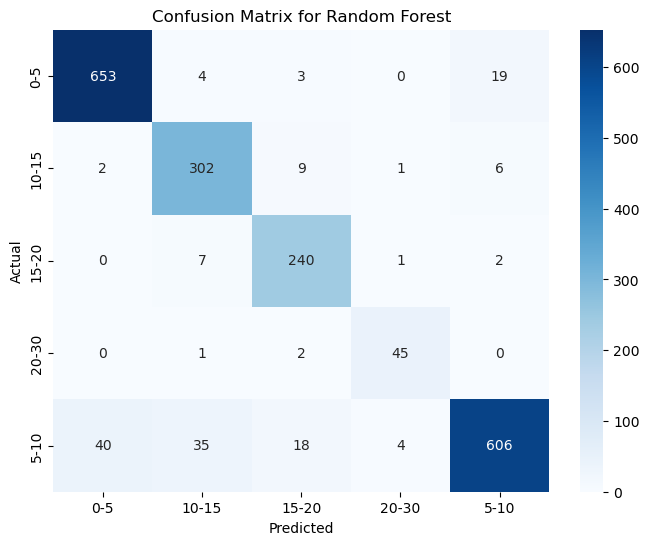


Training Support Vector Machine...
Accuracy: 90.45%


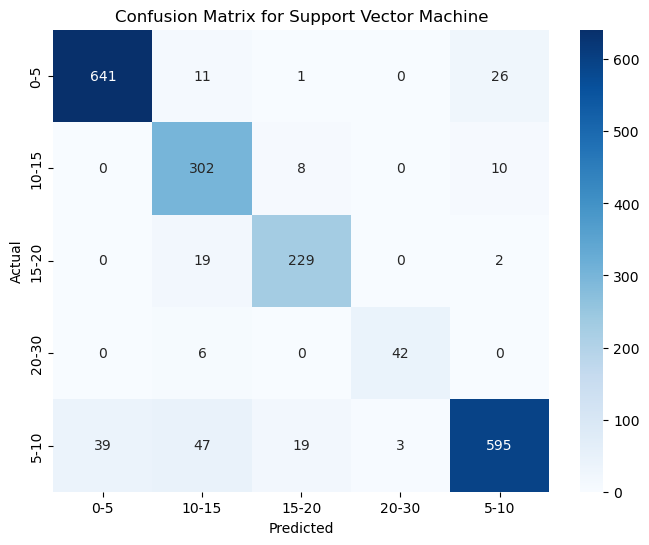


Training Logistic Regression...
Accuracy: 51.85%


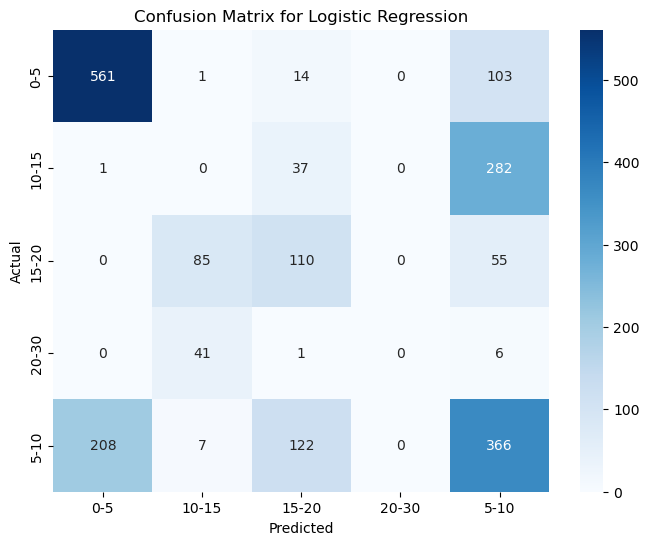


Training Decision Tree...
Accuracy: 87.15%


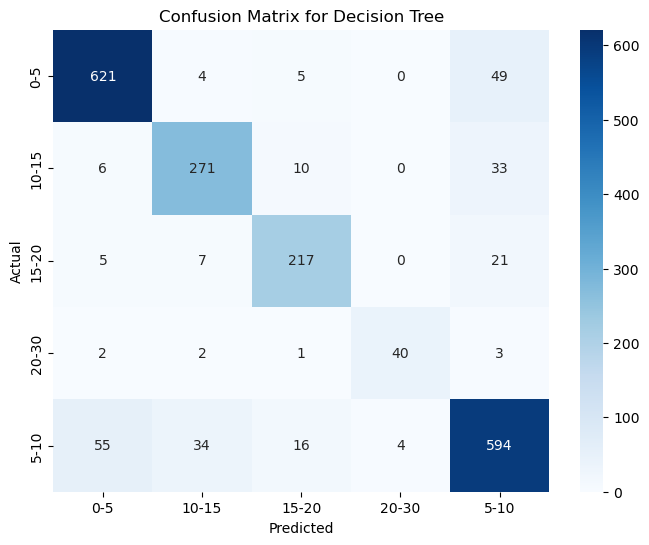


Training K-Nearest Neighbors...
Accuracy: 78.95%


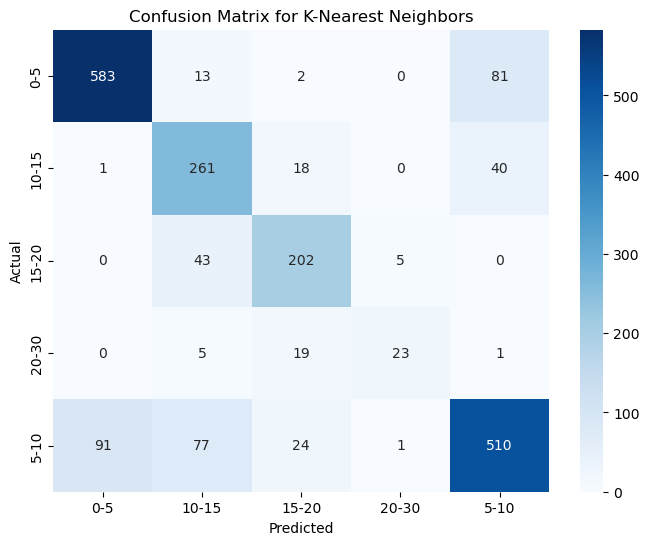


Training Naive Bayes...
Accuracy: 77.15%


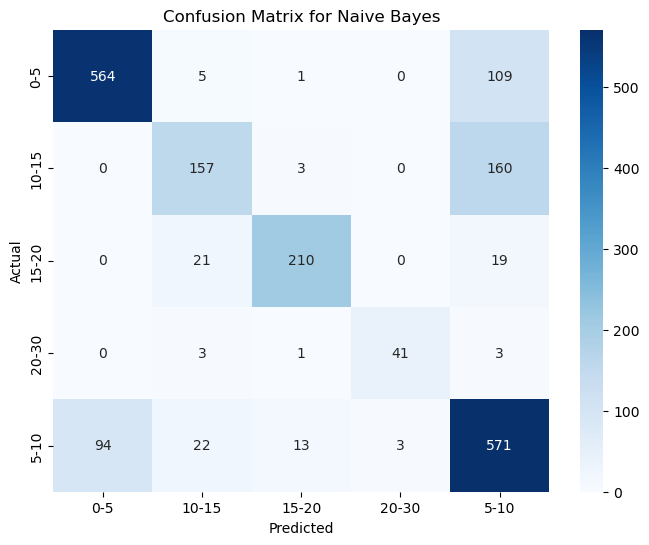

In [83]:
 #Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train model
    if model_name in ["Support Vector Machine", "K-Nearest Neighbors"]:
        # Models that require scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Other models that work fine with raw data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = accuracy
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Step 8: Plot confusion matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [84]:
df.to_csv('cleaned_cafe_sales.csv', index=False)
print("Cleaned dataset saved as 'cleaned_cafe_sales.csv'")

Cleaned dataset saved as 'cleaned_cafe_sales.csv'
